As a big fan of NBA and sports statistics, I wanted to predict the NBA MVP using a regression model

# Collecting and Cleaning Data

For Step 1: I collected the data from Kaggle, the Dataframe includes advanced and pergame average statistics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Kiro\OneDrive\Desktop\ML\NBA_MVP\Data\NBA_MVP.csv")

First we want to separate out the MVP's, we do this by grouping the dataframe by seasons and select the row with maximum "award_share" value, since that's our MVP, then add them back in the dataframe.

In [6]:
mvp = df.groupby(by = "season").max("award_share")
mvp["was_mvp"] = True
df = df.merge(mvp[["award_share", "was_mvp"]], on = ["season", "award_share"], how = "left")
df["was_mvp"] = df["was_mvp"].fillna(value = False)

In [7]:
mvp

,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,was_mvp
season,,,,,,,,,,,,,,,,,,,,,
1982,36,84,83,42.0,12.6,25.2,1.000,1.0,3.1,1.0,...,0.239,6.2,3.5,7.7,7.0,0.735,6.38,6.35,0.768,True
1983,37,83,82,40.3,11.7,22.6,0.750,0.8,2.5,1.0,...,0.248,6.0,4.3,7.5,7.2,0.960,7.67,7.53,0.793,True
1984,38,82,82,41.1,11.7,22.3,1.000,1.1,3.1,1.0,...,0.360,5.8,3.7,7.6,7.3,0.858,6.56,6.42,0.756,True
1985,37,82,82,39.5,12.6,23.7,0.637,1.2,3.3,1.0,...,0.238,6.8,4.6,8.8,8.7,0.978,7.35,6.70,0.768,True
1986,38,83,82,39.9,11.7,24.3,0.667,1.1,2.5,1.0,...,0.349,7.5,4.7,9.7,8.4,0.981,9.41,9.06,0.817,True
1987,39,82,82,40.6,13.4,27.8,1.000,1.2,3.0,1.0,...,0.627,21.0,7.2,26.1,10.6,0.940,9.30,8.32,0.793,True
1988,40,84,82,40.4,13.0,25.1,1.000,1.8,4.6,1.0,...,0.308,8.8,7.7,13.0,12.5,0.831,5.94,6.15,0.756,True
1989,41,82,82,40.2,11.9,22.9,0.750,2.2,6.1,1.0,...,0.292,8.4,6.2,11.9,11.4,0.782,7.70,7.95,0.768,True
1990,39,82,82,39.5,12.6,24.0,1.000,2.1,5.5,1.0,...,0.357,9.1,13.8,13.6,10.6,0.691,7.10,7.09,0.768,True


The next step would be to pre-process the data, or noise reduction, we first do this by removing repetitive stats, we notice a lot of statistics can be derived from other statistics, we do this by showing a 1 to 1 correlation between a stat and a combination of stats which can be used to derive it.

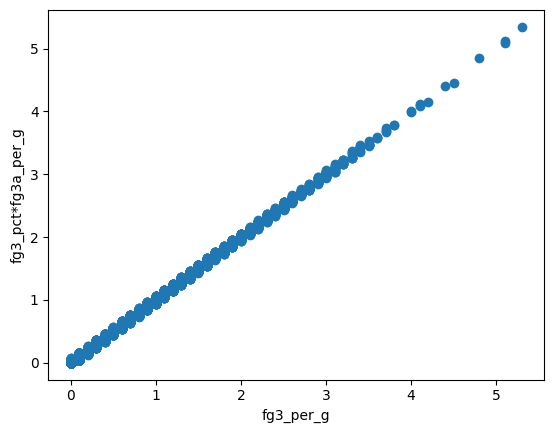

In [8]:
#looking at repetitive stats
plt.scatter(df["fg3_per_g"], df["fg3_pct"]*df["fg3a_per_g"])
plt.xlabel("fg3_per_g")
plt.ylabel("fg3_pct*fg3a_per_g")
plt.show()

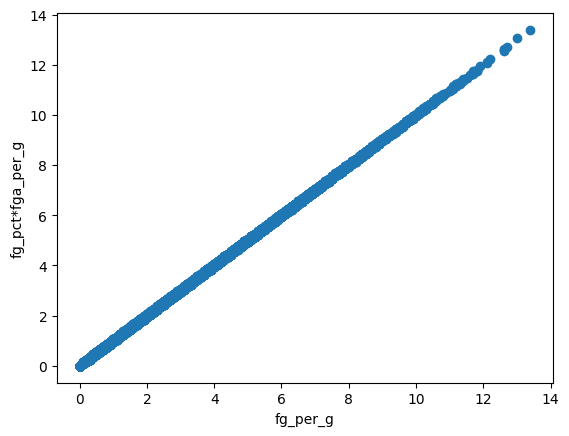

In [9]:
plt.scatter(df["fg_per_g"], df["fg_pct"]*df["fga_per_g"])
plt.xlabel("fg_per_g")
plt.ylabel("fg_pct*fga_per_g")
plt.show()

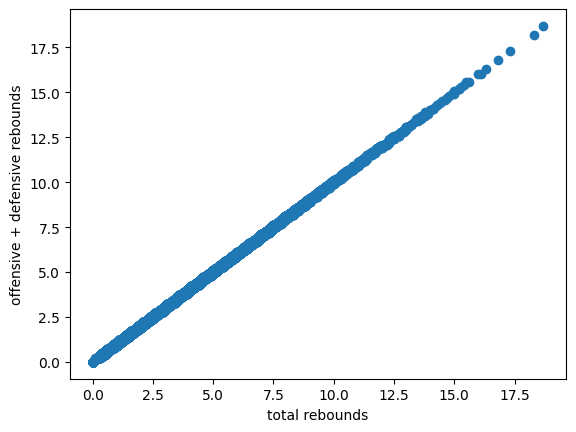

In [10]:
plt.scatter(df["trb_per_g"], df["orb_per_g"]+df["drb_per_g"])
plt.xlabel("total rebounds")
plt.ylabel("offensive + defensive rebounds")
plt.show()

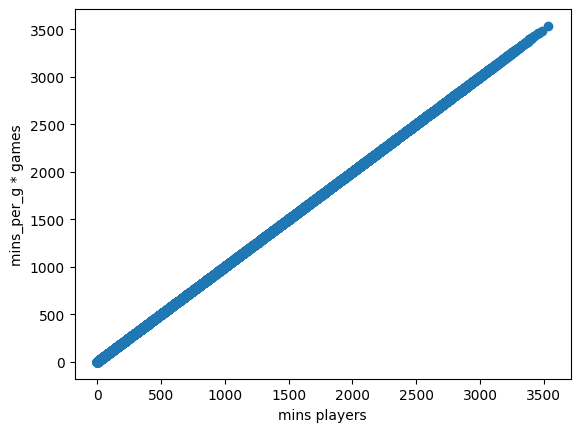

In [11]:
plt.scatter(df["mp"], df["mp_per_g"]*df["g"])
plt.xlabel("mins players")
plt.ylabel("mins_per_g * games")
plt.show()

We see we can derive fg_per_g by multiplying fga_per_g with fg_pct. Thus we can remove that statistic as it would be accounted in the model regardless. We also end up removing other such statistics.

In [12]:
#removing these stats, mostly the per games when raw stats are given
df = df.drop(columns = ["fg_per_g", "fg3_per_g", "fg2_per_g", "ft_per_g", "trb_per_g", "mp", "ws"])

We remove season 2022-23(current season) for testing in the end.

In [13]:
#proper voting system was implemented from 1981-82 season, so we use data from 1982 onwards
dftesting = df[df["season"] == 2022]
df = df[df["season"] < 2022]

dftesting

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,was_mvp
17092,2022,Precious Achiuwa,C,22,TOR,73,28,23.6,8.3,0.439,...,0.070,-2.0,-0.6,-2.6,-0.2,0.0,2.29,2.37,0.585,False
17093,2022,Steven Adams,C,28,MEM,76,75,26.3,5.1,0.547,...,0.163,1.0,1.0,2.0,2.0,0.0,5.68,5.37,0.683,False
17094,2022,Bam Adebayo,C,24,MIA,56,56,32.6,13.0,0.557,...,0.188,1.7,2.1,3.8,2.7,0.0,4.45,4.23,0.646,False
17095,2022,Santi Aldama,PF,21,MEM,32,0,11.3,4.1,0.402,...,0.044,-4.2,-1.5,-5.7,-0.3,0.0,5.68,5.37,0.683,False
17096,2022,LaMarcus Aldridge,C,36,BRK,47,12,22.3,9.7,0.550,...,0.141,1.3,-0.6,0.7,0.7,0.0,0.78,0.82,0.537,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,5.2,0.518,...,0.126,0.1,2.1,2.2,0.9,0.0,0.00,0.00,0.500,False
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,20.3,0.460,...,0.181,7.1,-2.0,5.2,4.8,0.0,1.56,1.55,0.524,False
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,4.4,0.526,...,0.145,-1.4,0.4,-1.0,0.2,0.0,4.45,4.23,0.646,False
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,3.3,0.567,...,0.143,-1.2,-1.0,-2.1,0.0,0.0,-8.88,-8.55,0.329,False


# Feature Engineering

A major issue that arrives now is biased dataset.
A biased dataset is a dataset that is unrepresentative or skewed in a way that introduces a systematic error or bias into the learning process. Since the number of people who did not recieve any MVP votes is much larger than the number of people who did in a given season, we have a class imbalance here.

I tackled this in the following manner:

In [14]:
#handling imbalanced dataset
mvps = df.loc[df["was_mvp"] == True]
mvps

#list of all mvps

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,was_mvp
186,1982,Moses Malone,C,26,HOU,81,81,42.0,22.5,0.519,...,0.218,6.2,-1.8,4.5,5.5,0.735,-0.04,-0.39,0.561,True
493,1983,Moses Malone,C,27,PHI,78,78,37.5,16.7,0.501,...,0.248,4.0,-0.3,3.7,4.2,0.960,7.67,7.53,0.793,True
647,1984,Larry Bird,PF,27,BOS,79,77,38.3,19.5,0.492,...,0.215,5.6,2.0,7.6,7.3,0.858,6.56,6.42,0.756,True
957,1985,Larry Bird,SF,28,BOS,80,77,39.5,22.0,0.522,...,0.238,6.8,2.0,8.8,8.7,0.978,6.65,6.47,0.768,True
1278,1986,Larry Bird,SF,29,BOS,82,81,38.0,19.6,0.496,...,0.244,6.6,2.1,8.7,8.4,0.981,9.41,9.06,0.817,True
1719,1987,Magic Johnson,PG,27,LAL,80,80,36.3,16.4,0.522,...,0.263,7.5,1.3,8.8,8.0,0.940,9.30,8.32,0.793,True
2067,1988,Michael Jordan,SG,24,CHI,82,82,40.4,24.4,0.535,...,0.308,8.8,4.2,13.0,12.5,0.831,3.40,3.76,0.610,True
2407,1989,Magic Johnson,PG,29,LAL,77,77,37.5,14.8,0.509,...,0.267,7.3,2.0,9.4,8.3,0.782,7.17,6.38,0.695,True
2767,1990,Magic Johnson,PG,30,LAL,79,79,37.2,14.4,0.480,...,0.270,8.3,1.8,10.1,8.9,0.691,6.78,6.74,0.768,True
3162,1991,Michael Jordan,SG,27,CHI,82,82,37.0,22.4,0.539,...,0.321,8.9,3.2,12.0,10.8,0.928,9.10,8.57,0.744,True


I want to find out the minimum statistic posted by any MVP in their respective year, for example, the lowest ppg recorded by an MVP in a season was by Steve Nash averaging 15.5 ppg, least games played in a season by an MVP is 49 by Bill Walton, only MVP to not make the playoffs was Kareem Abdul Jabbar with a W/L% of 56.1%.

Using these cutoffs, we can filter out a majority of players, leaving only 20-30 players per season.

While other models tend to use third standard deviations as their cutoffs, using min MVP stats is just as effective.
These cutoffs are anomalies in terms of statistics, and their respective MVP have to perform outstanding in other areas to win the award. All candidates considered after setting cutoffs can be considered "Stars or Superstars" in the league with a case to be considered for the MVP, still only half of those players get any votes at all, thus removing any impartiality in the dataset.

In [15]:
min_series = mvps.min()
min_series

season                       1982
player              Allen Iverson
pos                             C
age                            22
team_id                       BOS
g                              49
gs                             49
mp_per_g                     30.4
fga_per_g                    11.4
fg_pct                       0.42
fg3a_per_g                    0.0
fg3_pct                       0.0
fg2a_per_g                    8.5
fg2_pct                     0.441
efg_pct                     0.447
fta_per_g                     3.2
ft_pct                      0.524
orb_per_g                     0.6
drb_per_g                     2.6
ast_per_g                     1.3
stl_per_g                     0.5
blk_per_g                     0.1
tov_per_g                     2.1
pf_per_g                      1.4
pts_per_g                    15.5
per                          22.0
ts_pct                      0.518
fg3a_per_fga_pct            0.001
fta_per_fga_pct              0.25
orb_pct       

In [16]:
#remove all values from df where values < mvps_min, only significant values such as ppg, total games, ws, minutes played etc.
df = df[(df["pts_per_g"] >= 15.5) & (df["mp_per_g"] >= 30.4) & (df["win_loss_pct"] >= 0.561) & (df["g"] >= 48)].reset_index(drop = True)
df['season'].value_counts()
len(df)

dftesting = dftesting[(dftesting["pts_per_g"] >= 15.5) & (dftesting["mp_per_g"] >= 30.4) & (dftesting["win_loss_pct"] >= 0.561) & (dftesting["g"] >= 48)].reset_index(drop = True)


df["season"].value_counts()

#kareem abdul jabbar - only mvp to win without making the playoffs (40-42), still we use 0.561 as in the modern nba no one's
#winning the mvp without qualifying for the playoffs atleast

season
2018    29
2010    29
2020    29
2008    29
2009    28
2019    27
2003    27
2001    27
1989    26
1990    26
1991    26
2015    25
1994    24
1995    23
2014    23
1983    23
1996    22
1997    22
1992    22
2011    22
2017    22
2005    22
2007    21
1993    21
2012    21
2021    20
2000    20
1988    20
1986    20
1985    20
1984    20
2013    20
1982    19
2004    18
1998    18
1987    18
2006    17
2016    17
2002    15
1999    10
Name: count, dtype: int64

In [17]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,fg3a_per_g,fg3_pct,fg2a_per_g,fg2_pct,efg_pct,fta_per_g,ft_pct,orb_per_g,drb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,was_mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,0.0,0.000,17.1,0.580,0.579,5.8,0.706,2.3,6.4,3.0,0.8,2.7,3.0,2.9,23.9,23.4,0.608,0.002,0.340,7.3,19.1,13.4,11.9,1.1,4.1,13.3,25.6,6.9,3.9,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,False
1,1982,Larry Bird,PF,25,BOS,77,58,38.0,18.4,0.503,0.7,0.212,17.7,0.514,0.507,4.9,0.863,2.6,8.3,5.8,1.9,0.9,3.3,3.2,22.9,22.6,0.557,0.037,0.269,7.7,23.4,15.8,22.5,2.3,1.2,13.8,25.2,6.8,5.7,0.205,4.4,2.3,6.6,6.4,0.588,6.38,6.35,0.768,False
2,1982,Alex English,SF,28,DEN,82,82,36.8,18.9,0.551,0.1,0.000,18.8,0.553,0.551,5.4,0.840,2.6,4.2,5.3,1.1,1.5,3.2,3.2,25.4,22.2,0.596,0.005,0.285,7.7,12.0,9.9,19.9,1.3,2.0,13.0,25.3,8.9,0.6,0.152,4.9,-1.1,3.8,4.4,0.017,0.52,0.13,0.561,False
3,1982,Julius Erving,SF,31,PHI,81,81,34.4,17.6,0.546,0.1,0.273,17.5,0.548,0.547,6.7,0.763,2.7,4.2,3.9,2.0,1.7,2.6,2.8,24.4,25.9,0.593,0.008,0.377,9.3,13.0,11.2,18.1,2.8,2.9,11.4,28.1,8.7,4.6,0.229,6.0,1.7,7.7,6.8,0.294,5.73,5.74,0.707,False
4,1982,George Gervin,SG,29,SAS,79,79,35.7,25.2,0.500,0.5,0.278,24.7,0.504,0.502,8.1,0.864,1.7,3.2,2.4,1.0,0.6,2.7,2.7,32.3,24.2,0.562,0.018,0.323,5.2,9.7,7.5,11.4,1.3,0.9,8.5,35.0,8.7,2.0,0.182,5.4,-1.5,3.9,4.2,0.159,2.30,1.79,0.585,False
5,1982,Elvin Hayes,PF,36,HOU,82,82,37.0,13.4,0.472,0.1,0.000,13.4,0.474,0.472,5.1,0.664,3.3,5.9,1.8,0.8,1.3,2.5,3.5,16.1,14.4,0.513,0.005,0.384,9.4,18.1,13.6,6.6,1.0,1.9,13.9,20.2,2.3,2.9,0.081,-0.6,-0.7,-1.4,0.5,0.000,-0.04,-0.39,0.561,False
6,1982,Dan Issel,C,33,DEN,81,81,30.5,15.3,0.527,0.1,0.667,15.2,0.526,0.528,8.1,0.834,2.1,5.4,2.2,0.8,0.7,2.1,3.0,22.9,23.1,0.608,0.005,0.530,7.7,18.3,13.2,9.8,1.2,1.1,10.0,26.0,9.0,0.8,0.190,4.0,-1.8,2.2,2.6,0.004,0.52,0.13,0.561,False
7,1982,Dennis Johnson,SG,27,PHO,80,77,36.7,15.4,0.470,0.5,0.190,14.8,0.480,0.473,6.2,0.806,1.8,3.4,4.6,1.3,0.7,2.9,3.2,19.5,16.7,0.540,0.034,0.403,5.5,9.8,7.7,18.3,1.7,1.1,13.9,23.6,4.1,4.0,0.132,1.2,0.1,1.3,2.5,0.001,3.45,3.05,0.561,False
8,1982,Magic Johnson,SG,22,LAL,78,77,38.3,13.3,0.537,0.4,0.207,12.9,0.546,0.540,5.6,0.760,3.2,6.4,9.5,2.7,0.4,3.7,2.9,18.6,22.9,0.590,0.028,0.418,9.5,17.5,13.7,31.0,3.2,0.6,18.9,20.1,8.1,4.8,0.207,4.9,2.3,7.2,7.0,0.097,4.87,4.37,0.695,False
9,1982,Marques Johnson,SF,25,MIL,60,52,31.7,12.7,0.532,0.1,0.000,12.6,0.534,0.532,4.3,0.700,2.6,3.5,3.6,1.0,0.6,2.4,2.4,16.5,18.0,0.566,0.005,0.342,9.6,12.3,11.0,16.4,1.5,1.1,14.2,22.1,3.5,2.7,0.158,2.9,0.0,2.9,2.3,0.004,5.48,5.38,0.671,False


Thank you Robert Sunderhaft for this pie chart

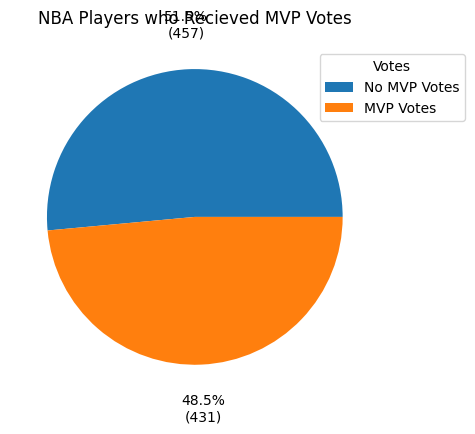

In [18]:
from collections import Counter

classes = df["award_share"] > 0
dataDf = df.drop(["player", "pos", "team_id", "was_mvp"], axis = 1)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")

ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

We see that the ratio of Players with MVP votes to Non-MVP Votes is now approximately 1, since we have removed the imbalance in the dataset, we can proceed to divide the dataset in Features, Targets and General Information.

# Random Forest Regression

In [19]:
#imbalance has been removed, now we can start running models
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
#features we need to fit in the data
columns = ['age', 'g', 'gs', 'mp_per_g', 'fga_per_g', 'fg_pct',
        'fg2a_per_g', 'fg2_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'drb_per_g',
        'ast_per_g', 'stl_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g',
        'per', 'ts_pct', 'fta_per_fga_pct', 'drb_pct', 'trb_pct', 'ast_pct',
        'stl_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws_per_48',
        'obpm', 'dbpm', 'bpm', 'vorp', 'mov', 'win_loss_pct']

In [21]:
Info = df[["season", "player", "pos", "team_id","award_share",  "was_mvp"]]
Data = df[columns]
Targets = df[["award_share"]]

We're going to use a basic Random Forest Regressor as out model of choice as it's one of the best models for regression and becuase its the only model I know how to use :)

Random Forest Models are a type of decision tree and decision trees can become very biased with unbalanced data. Thus we must balance the data before we run our model.

Major advantage is that we dont have to scale out data since decision trees dont require feature scaling.

In [19]:
seasons = df.season.unique()

correct = 0

for season in seasons:
    print("\n")
    print("Season =", season)
    
    X_train = Data[Info["season"] != season]
    y_train = Targets[Info['season'] != season]
    
    y_info =  Info[Info["season"] == season]
    
    X_test = Data[Info["season"] == season]
    y_test = Targets[Info['season'] == season]
    
    regr = RandomForestRegressor(n_estimators = 150, max_depth = 25, random_state = 5)
    
    regr.fit(X_train.to_numpy(), y_train.to_numpy())
    
    y_pred = regr.predict(X_test)
    
    top3 = y_info.iloc[np.argsort(y_pred)[-5:]]
    print(top3.iloc[::-1])
    
    MVP_pred = np.argmax(y_pred)
    was_mvp = y_info.iloc[[MVP_pred]]["was_mvp"].values[0]
    player = y_info.iloc[[MVP_pred]]["player"].values[0]
    
    if(was_mvp):
        correct += 1
        
    print("Predicted MVP:", player)
    print("Was MVP correctly predicted?", was_mvp)



Season = 1982
    season         player pos team_id  award_share  was_mvp
10    1982   Moses Malone   C     HOU        0.735     True
3     1982  Julius Erving  SF     PHI        0.294    False
8     1982  Magic Johnson  SG     LAL        0.097    False
4     1982  George Gervin  SG     SAS        0.159    False
1     1982     Larry Bird  PF     BOS        0.588    False
Predicted MVP: Moses Malone
Was MVP correctly predicted? True


Season = 1983
    season               player pos team_id  award_share  was_mvp
29    1983         Moses Malone   C     PHI        0.960     True
20    1983           Larry Bird  PF     BOS        0.485    False
25    1983        Magic Johnson  SG     LAL        0.406    False
22    1983        Julius Erving  SF     PHI        0.149    False
19    1983  Kareem Abdul-Jabbar   C     LAL        0.020    False
Predicted MVP: Moses Malone
Was MVP correctly predicted? True


Season = 1984
    season         player pos team_id  award_share  was_mvp
43    1984  

     season            player pos team_id  award_share  was_mvp
393    2000  Shaquille O'Neal   C     LAL        0.998     True
389    2000       Karl Malone  PF     UTA        0.258    False
383    2000        Tim Duncan  PF     SAS        0.205    False
384    2000     Kevin Garnett  PF     MIN        0.337    False
392    2000   Alonzo Mourning   C     MIA        0.303    False
Predicted MVP: Shaquille O'Neal
Was MVP correctly predicted? True


Season = 2001
     season            player pos team_id  award_share  was_mvp
419    2001  Shaquille O'Neal   C     LAL        0.466    False
410    2001     Allen Iverson  SG     PHI        0.904     True
403    2001       Kobe Bryant  SG     LAL        0.009    False
425    2001      Chris Webber  PF     SAC        0.420    False
406    2001        Tim Duncan  PF     SAS        0.569    False
Predicted MVP: Shaquille O'Neal
Was MVP correctly predicted? False


Season = 2002
     season            player pos team_id  award_share  was_mvp
428

     season             player pos team_id  award_share  was_mvp
794    2018       James Harden  SG     HOU        0.955     True
798    2018       LeBron James  PF     CLE        0.731    False
810    2018  Russell Westbrook  PG     OKC        0.075    False
789    2018      Anthony Davis  PF     NOP        0.441    False
788    2018      Stephen Curry  PG     GSW        0.005    False
Predicted MVP: James Harden
Was MVP correctly predicted? True


Season = 2019
     season                 player pos team_id  award_share  was_mvp
813    2019  Giannis Antetokounmpo  PF     MIL        0.932     True
823    2019           James Harden  PG     HOU        0.768    False
825    2019           Nikola Jokić   C     DEN        0.210    False
819    2019            Joel Embiid   C     PHI        0.049    False
820    2019            Paul George  SF     OKC        0.352    False
Predicted MVP: Giannis Antetokounmpo
Was MVP correctly predicted? True


Season = 2020
     season                 pla

Very interesting results, the major anomalies are the 2005-06 and 2006-07 season, both MVP's were won by Steve Nash yet he's not even in the top 5 predicted MVP's. 

Both seasons were very controversial in terms of who should have won the MVP, Let's compare Steve Nash vs Kobe Bryant in those seasons

Steve Nash - 18.6 Points Per Game, 3.5 Rebounds Per Game, 10.5 Assists Per Game
Kobe Bryant - 35.4 Points Per Game, 5 Rebounds Per Game, 4.5 Assists Per Game

Large difference in Points per Game to Kobe, but also in Assists Per Game for Steve Nash. The results by the model can be explained. Up till this point, MVP's were won by the flashier player who had high scoring numbers, while Steve Nash was more of a pure Point Guard who controlled the game and won by leading the team in assists and setting other players up, while getting the MVP over Kobe was sure worth a debate, the model does not account for assists_per_game as a major feature in predicting the MVP as we will see later in our SHAP analysis.

Another reason was media bias, Kobe was coming off three NBA championships in 2000, 2001, 2002 seasons where the general narrative was the Kobe was carried by Shaq, since Kobe finished with a 42-40 record, it only strengthened that narrative, thus, in the end, Steve Nash ended up winning the MVP, our model could not have predicted media bias and the value of assists_per_game.

One thing to fix this could have been to add a seeding feature, while W/L% kinda accurately predicts the seeding, Steve Nash had a win/loss of 0.74 and the second seed, while our model only considers the 0.74. Adding a seeding feature might have helped this. 

In [20]:
print(f"The Random Forest Model predicted the NBA MVP correctly {(correct/len(seasons)) * 100}% of the time")

The Random Forest Model predicted the NBA MVP correctly 75.0% of the time


In [21]:
#Lets predict the 2022 season now
testInfo = dftesting[["season", "player", "pos", "team_id","award_share",  "was_mvp"]]

regr = RandomForestRegressor(n_estimators = 150, max_depth = 25, random_state = 5)
regr.fit(Data, Targets)

pred_this_season = regr.predict(dftesting[columns])

topTen = testInfo.iloc[np.argsort(pred_this_season)[-10:]]
print("Predicted top ten players in MVP voting with their actual award_share:")
print(topTen.iloc[::-1])

Predicted top ten players in MVP voting with their actual award_share:
    season                 player pos team_id  award_share  was_mvp
17    2022           Nikola Jokić   C     DEN        0.875     True
1     2022  Giannis Antetokounmpo  PF     MIL        0.595    False
12    2022            Joel Embiid   C     PHI        0.706    False
10    2022            Luka Dončić  PG     DAL        0.146    False
22    2022              Ja Morant  PG     MEM        0.010    False
25    2022           Jayson Tatum  SF     BOS        0.043    False
13    2022            Rudy Gobert   C     UTA        0.000    False
9     2022          DeMar DeRozan  PF     CHI        0.001    False
26    2022     Karl-Anthony Towns   C     MIN        0.000    False
8     2022          Stephen Curry  PG     GSW        0.004    False


Our model correctly predicts the top 3 MVP candidates for the current season, we can confidently use it for the 2023-24 season.

# Variable Analysis

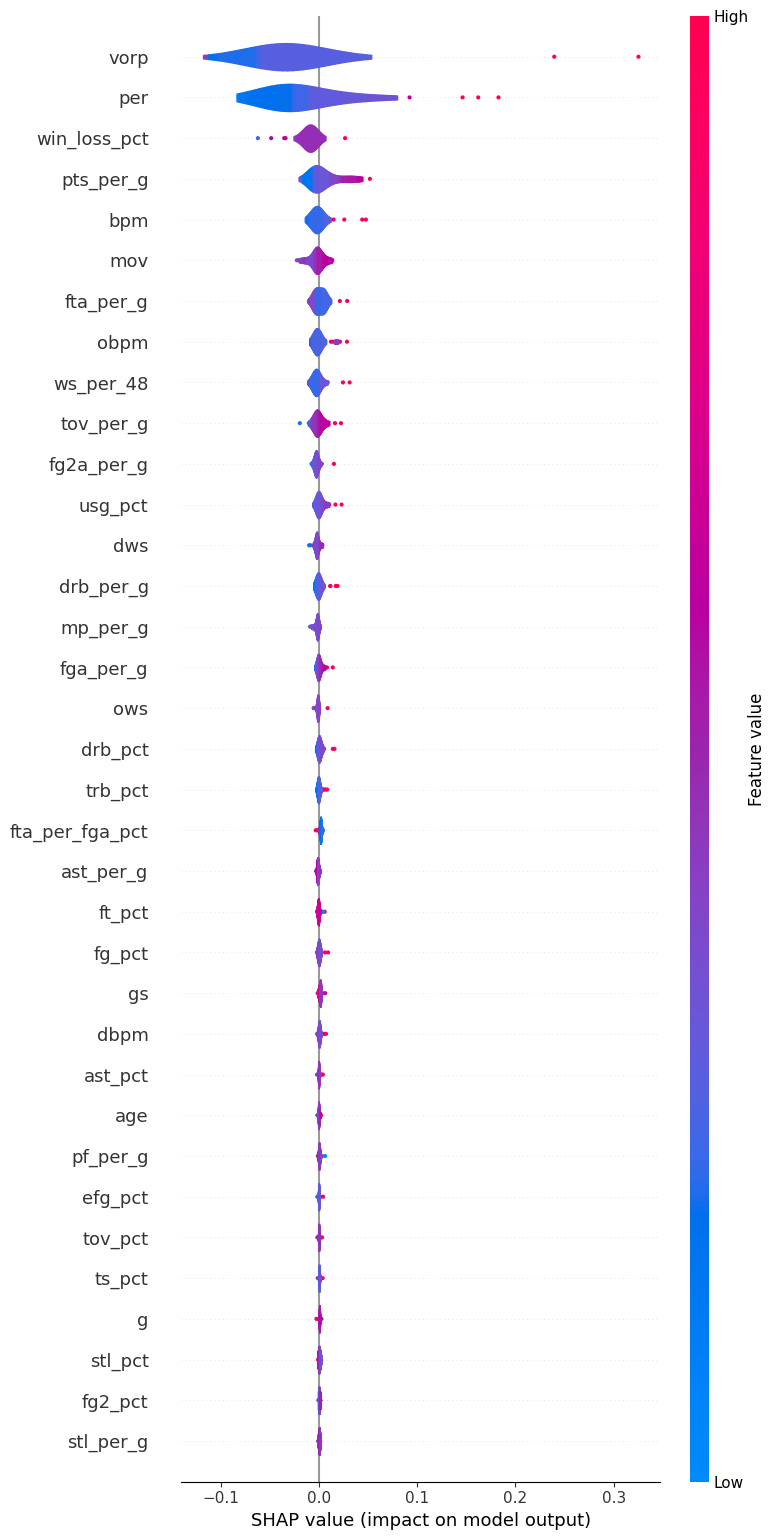

In [22]:
import shap

np.bool = np.bool_ #why does this work idk

explainer = shap.TreeExplainer(regr)
shap_values = explainer(dftesting[columns])

shap.summary_plot(shap_values, dftesting[columns], plot_type='violin', max_display=len(dftesting[columns].columns))

Variable Analysis shows the usual suspects at the top- PER, VORP, W/L%, ppg, bpm. 

Comparing to other models, one sort of important feature that I missed is seeding while games_played and assists_per_game are a bit lower than I would have liked. Other than this, most features have expected importance.

# Future Improvements

While the model is 75% accurate, this can be vastely improved

1. Add a Seed feature to the Dataset
2. Use Sentiment Analysis to account for media bias and voter fatigue

It all comes down to spending more time feature engineering and maybe using more models.

This is my first end-to-end ML project and I intend to keep on improving it throughtout the years.

Lastly I would like to thank Robert Sunderhaft. He is a Research Assistant and Eminence Fellow at The Ohio State University who also attempted this project and gave me great inspiration for my project too. If you have time, do check out his approach!

# Update

The 2023 NBA MVP ended up being Joel Embiid over Nikola Jokic.

This is a massive reason why Media Bias and Voter Fatigue has to be accounted for while predicting the MVP, while Embiid was better than Jokic in most statistically speaking, Jokic had more team success Embiid had missed a lot of games due to a knee injurt. It would have been a close race and Jokic would have been voted the MVP if not for Kendrick Perkins pulling a media stunt on live television.

Kendrick Perkins called out the MVP voters. Quoting https://www.theguardian.com/sport/blog/2023/may/03/joel-embiid-mvp-wokeism-philadelphia-76ers, 
"During a First Take debate about Embiid’s chances of unseating reigning two-time MVP Nikola Jokic, Perkins held fast to the idea that the largely white media constituency that votes on the award has a habit of playing identity politics and choosing white players over Black ones."
essentially calling the voters racist towards black people and giving bias to Jokic, and citing this was the reason Steve Nash won his 2 MVP's despite having lackluster statistics compared to Kobe Bryant.

Immediately the next week, Embiid was the front runner for the MVP Award.

Need to somehow add media bias and voter fatigue.